# data reading

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [22]:
df=pd.read_csv("Visadataset.csv")

In [23]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [24]:
# figuring the number of null values null values
df.isna().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

In [25]:
# looking for duplicate Values
df.duplicated().sum()               

0

In [26]:
# loading the complete information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [27]:

# analysis :
# [ continent,	education_of_employee,has_job_experience,requires_job_training,	region_of_employment	prevailing_wage	unit_of_wage	full_time_position] ---> object type
#  [no_of_employees	yr_of_estab] ---> int type
#  [prevailing_wage]	---? float type


In [28]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [29]:
# as minimum number of employes are negative that is not possible so what we do is to replace the value by minimum value in the dataset    
df["no_of_employees"] = df["no_of_employees"].apply(lambda x: np.nan if x <= 0 else x)
min_positive = df["no_of_employees"][df["no_of_employees"] > 0].min()
df["no_of_employees"] = df["no_of_employees"].fillna(min_positive)
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.081750,1979.409929,74455.814592
std,22877.919295,42.366929,52815.942327
min,12.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


# Analysis 

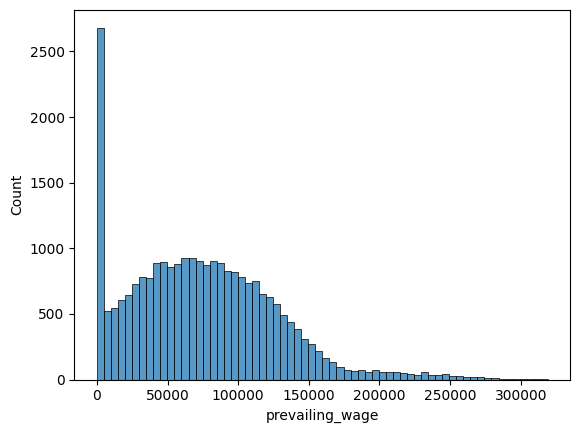

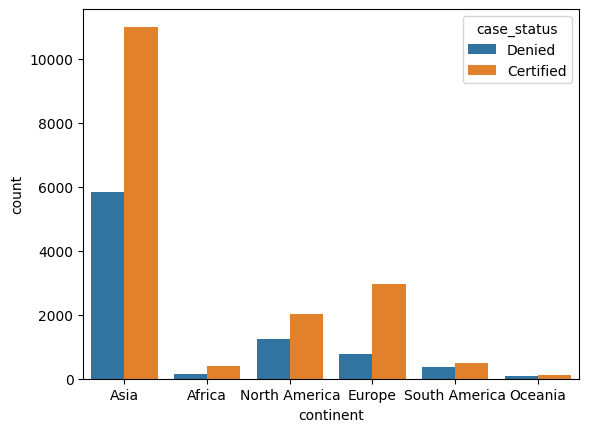

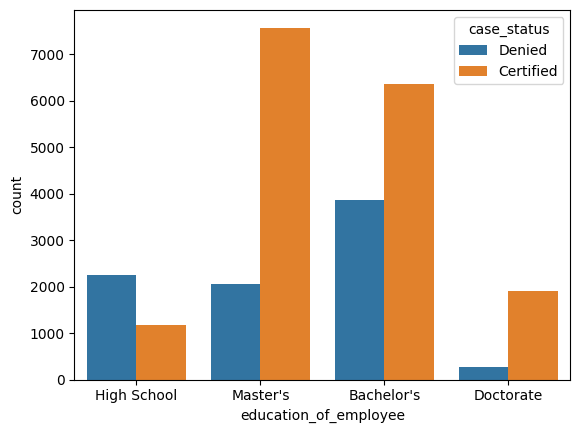

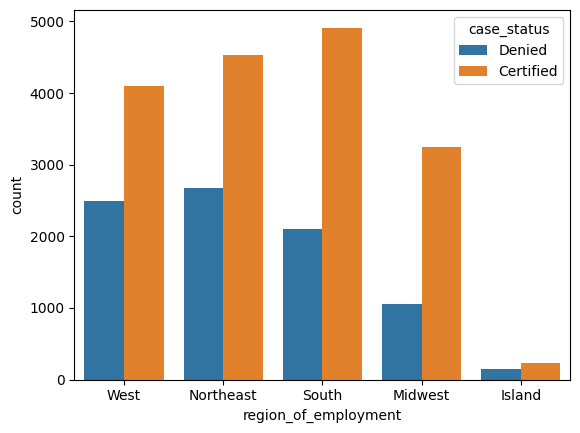

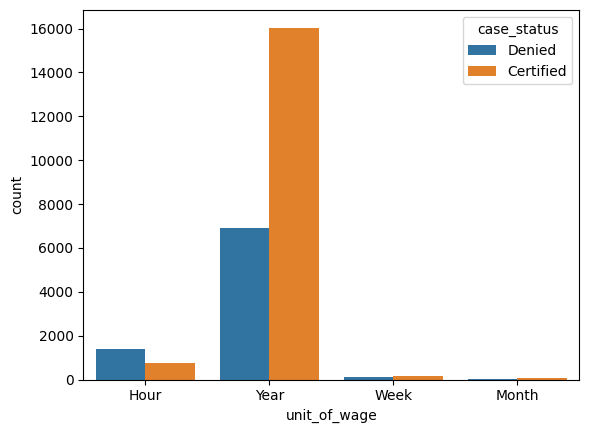

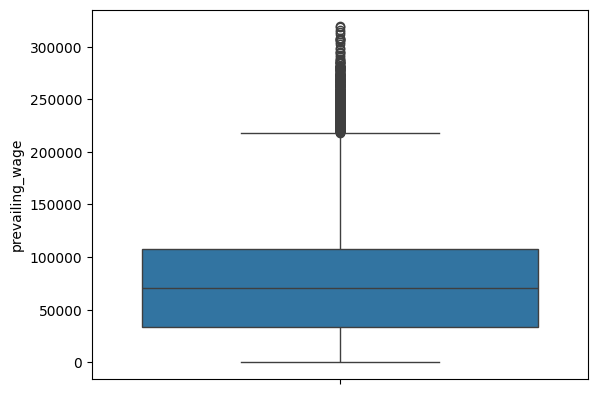

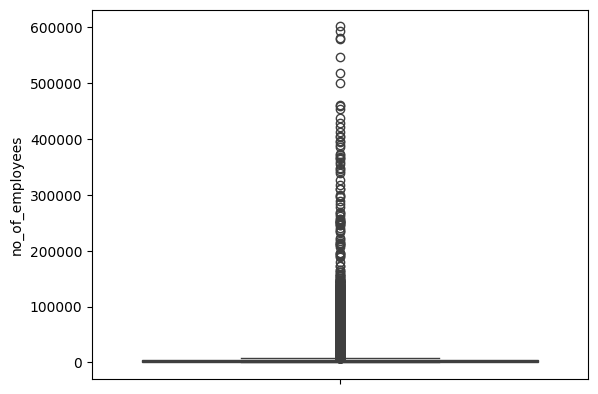

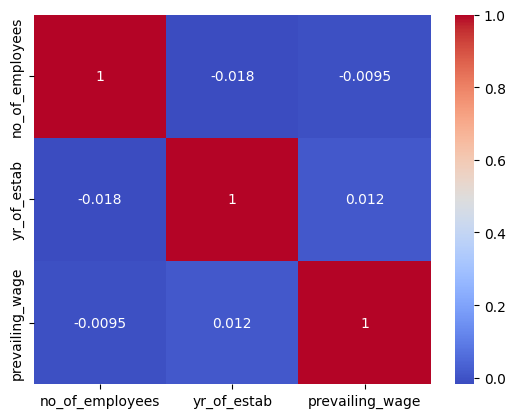

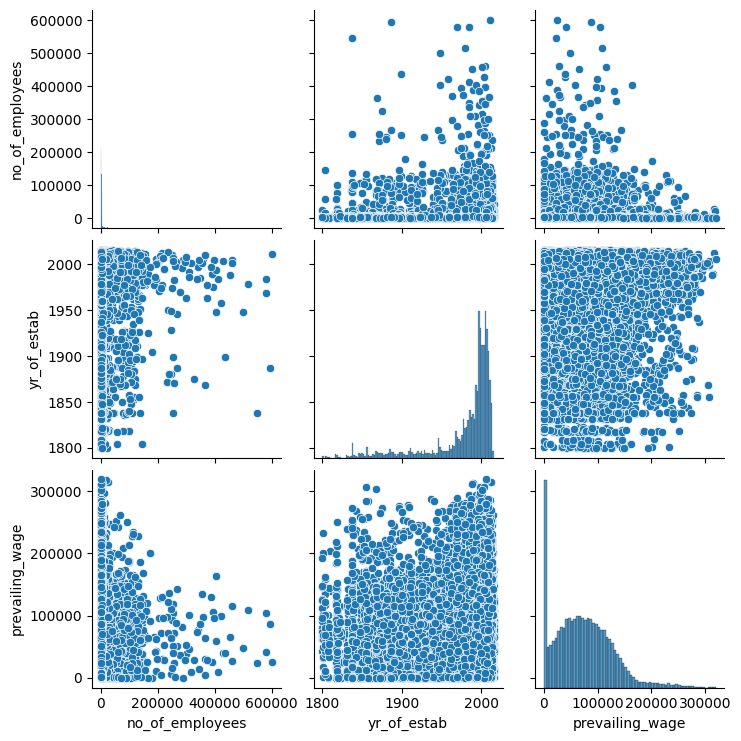

In [30]:
sns.histplot(x=df["prevailing_wage"])
plt.show()
sns.countplot(x="continent",hue=df["case_status"],data=df)
plt.show()
sns.countplot(x="education_of_employee",hue=df["case_status"],data=df)
plt.show()
sns.countplot(x="region_of_employment",hue=df["case_status"],data=df)
plt.show()
sns.countplot(x="unit_of_wage",hue=df["case_status"],data=df)
plt.show()
sns.boxplot(df["prevailing_wage"])
plt.show()
sns.boxplot(df["no_of_employees"])
plt.show()
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()
sns.pairplot(df)

In [12]:

# 1. from understanding graphs i m thinking to club  continet [oceania , Africa and South America ] into a fetaure naming other because all they have is very little number of points and have almost equal splits betwen case_status 

# 2. i will club the [prevailing_wage,unit_of_wage] into a single a single filed under the name wage considering 40 hr/week and 52 week/year



# feature creation / deletion

In [13]:
# importing function to convert the fields from a file name functions.py because these same functions will be used when i convert the user inputs

from functions import calc_company_age,calc_wage,convert_continent,label_company_size
from datetime import datetime

In [14]:
df["yearly_wage"]=df.apply(calc_wage,axis=1)
df["company_size"]=df.apply(label_company_size,axis=1)
df["continents_modified"]=df.apply(convert_continent,axis=1)
df["company_age"]=df.apply(calc_company_age,axis=1)


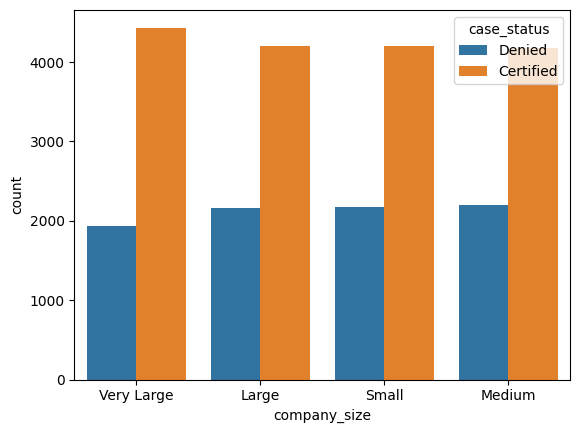

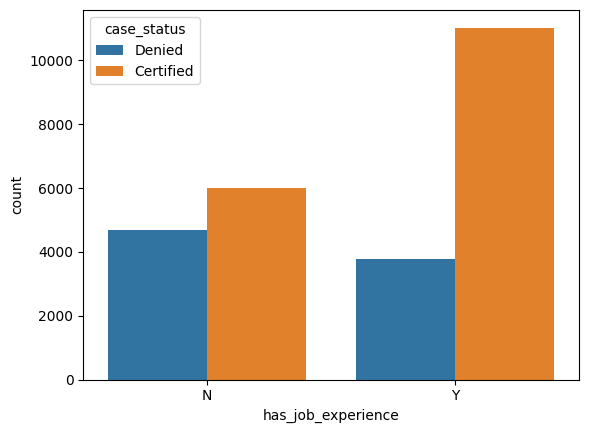

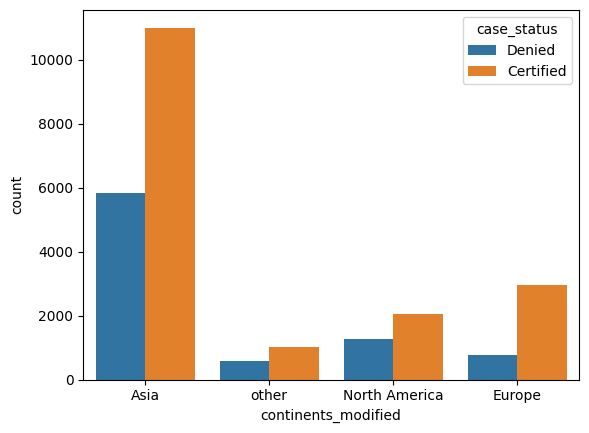

In [15]:
# viewing data with respect to new features and output 

sns.countplot(x="company_size",hue=df["case_status"],data=df)
plt.show()
sns.countplot(x="has_job_experience",hue=df["case_status"],data=df)
plt.show()
sns.countplot(x="continents_modified",hue=df["case_status"],data=df)
plt.show()

In [16]:
# viewing the total colums present in the dataset
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status', 'yearly_wage', 'company_size',
       'continents_modified', 'company_age'],
      dtype='object')

### reasons for dropping features

In [17]:
# dropping case_id because even though it is unique but has noting to do with the visa being Denied or Certified

# removing "continent" because i have "continent_modified" --> in this what i have done is on ralising that majority data points are from aisa , secondly fro m europe and third from North america , rest have a very less amount of features so i club every other continent into a single label called "others "

#removing "requires_job_training" because it is irrelevant for the visa granting comitte whether you need job training or not 

#removing "no_of_employees" because i have converted it into a categorical feature of "company_size"

#removing "yr_of_estab" because i have converted it into a continuous feature of "company_age"

#removing "" because i have converted it into a continuous feature of "company_age"

# 'prevailing_wage', 'unit_of_wage' becuase i have converted it into a continuous feature called "yearly_wage"


df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,yearly_wage,company_size,continents_modified,company_age
0,EZYV01,Asia,High School,N,N,14513.0,2007,West,592.2029,Hour,Y,Denied,1231782,Very Large,Asia,18
1,EZYV02,Asia,Master's,Y,N,2412.0,2002,Northeast,83425.6500,Year,Y,Certified,83425,Large,Asia,23
2,EZYV03,Asia,Bachelor's,N,Y,44444.0,2008,West,122996.8600,Year,Y,Denied,122996,Very Large,Asia,17
3,EZYV04,Asia,Bachelor's,N,N,98.0,1897,West,83434.0300,Year,Y,Denied,83434,Small,Asia,128
4,EZYV05,Africa,Master's,Y,N,1082.0,2005,South,149907.3900,Year,Y,Certified,149907,Medium,other,20


In [18]:
# selecting only useful features from the data set
df=df[["continents_modified","education_of_employee","has_job_experience","region_of_employment","full_time_position","yearly_wage","company_size","company_age","case_status"]]

<Axes: >

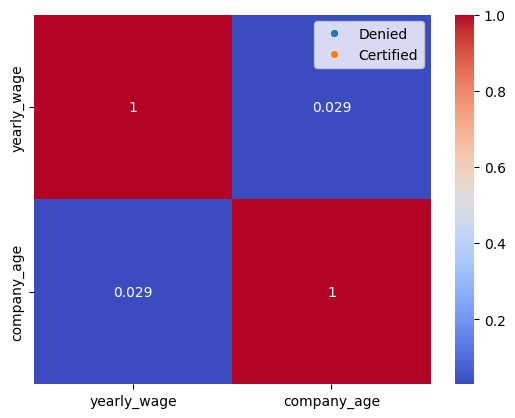

In [19]:
sns.scatterplot(x="yearly_wage", y="company_age", hue="case_status", data=df)
sns.boxplot(x="case_status", y="yearly_wage", data=df)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")


In [19]:
df.dtypes

continents_modified      object
education_of_employee    object
has_job_experience       object
region_of_employment     object
full_time_position       object
yearly_wage               int64
company_size             object
company_age               int64
case_status              object
dtype: object

In [20]:
# creating dependent and independent features alonf with mapping of "Denied"  to 0 and "Certified" to 1  
X=df.drop("case_status",axis=1)
Y=df["case_status"].map({"Denied":0,"Certified":1})

### classifying features as categorical and numerical

In [ ]:

categorical_features=[x for x in X.columns if X[x].dtype=="O"]
numerical_features=[x for x in X.columns if x not in categorical_features]
numerical_features

['yearly_wage', 'company_age']

### train test split

In [22]:
# performing train test split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=42)
pd.DataFrame(xtrain.iloc[1])

,6830
continents_modified,North America
education_of_employee,Master's
has_job_experience,Y
region_of_employment,West
full_time_position,Y
yearly_wage,102403
company_size,Small
company_age,13


In [23]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
numerical_encoder=StandardScaler()
categorical_encoder=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ("OneHotEncoding",categorical_encoder,categorical_features),
        ("StandardScaler",numerical_encoder,numerical_features)
    ],remainder="passthrough"
)
import pickle 
pickle.dump(preprocessor,open("preprocessor.pkl","wb"))
pickle.dump(xtrain,open("train.pkl","wb"))

In [24]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('OneHotEncoding', OneHotEncoder(),
                                 ['continents_modified',
                                  'education_of_employee', 'has_job_experience',
                                  'region_of_employment', 'full_time_position',
                                  'company_size']),
                                ('StandardScaler', StandardScaler(),
                                 ['yearly_wage', 'company_age'])])

In [25]:
xtrain=preprocessor.fit_transform(xtrain)

In [26]:
xtest=preprocessor.transform(xtest)

### SMOTE

In [27]:
smote=SMOTE(random_state=42)
xtrain_balanced,ytrain_balanced=smote.fit_resample(xtrain,ytrain)
ytrain_balanced.value_counts()

case_status
0    13617
1    13617
Name: count, dtype: int64

In [28]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from functions import evaluate_model

### model training

In [29]:
model_test_results=[]
model_train_results=[]
models={
    "Logistic Regression":LogisticRegression(),
    "Decision Tree Classifier":DecisionTreeClassifier(max_depth=None),
    "SVC":SVC(class_weight="balanced"),
    "Random Forest Classifier":RandomForestClassifier(max_depth=None),
    "Gradient Boosting Classifier":GradientBoostingClassifier(),
    "XGBClassifier":XGBClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(xtrain_balanced,ytrain_balanced)
    
    # make prdiction 
    y_train_pred=model.predict(xtrain_balanced)
    y_test_pred=model.predict(xtest)
    
    # trainig performance
    train_model_accuracy,train_model_f1,train_model_precision,train_model_recall,train_model_roc_auc,train_model_confusion_matrix=evaluate_model(ytrue=ytrain_balanced,ypred=y_train_pred)
    
    # test performance
    test_model_accuracy,test_model_f1,test_model_precision,test_model_recall,test_model_roc_auc,test_model_confusion_matrix=evaluate_model(ytrue=ytest,ypred=y_test_pred)
    
    model_test_results.append({
            "model_name":list(models.keys())[i],
            "Accuracy": round(test_model_accuracy, 4),
            "F1-Score": round(test_model_f1, 4),
            "Precision": round(test_model_precision, 4),
            "Recall": round(test_model_recall, 4),
            "ROC AUC": round(test_model_roc_auc, 4),
            "confusion_matrix":test_model_confusion_matrix
        }
    )
    model_train_results.append({
            "model_name":list(models.keys())[i],
            "Accuracy": round(train_model_accuracy, 4),
            "F1-Score": round(train_model_f1, 4),
            "Precision": round(train_model_precision, 4),
            "Recall": round(train_model_recall, 4),
            "ROC AUC": round(train_model_roc_auc, 4),
            "confusion_matrix":train_model_confusion_matrix
        }
    )
    

In [30]:
model_test_results_df=pd.DataFrame(model_test_results)
model_train_results_df=pd.DataFrame(model_train_results)

In [31]:
print("displaying training data results")
model_train_results_df

displaying training data results


,model_name,Accuracy,F1-Score,Precision,Recall,ROC AUC,confusion_matrix
0,Logistic Regression,0.6881,0.6858,0.6909,0.6808,0.6881,0.688110
1,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000
2,SVC,0.7164,0.7241,0.7051,0.7441,0.7164,0.716421
3,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.000000
4,Gradient Boosting Classifier,0.7286,0.7262,0.7328,0.7198,0.7286,0.728648
5,XGBClassifier,0.8151,0.8190,0.8021,0.8366,0.8151,0.815121


In [32]:
print("displaying test data results")

model_test_results_df

displaying test data results


,model_name,Accuracy,F1-Score,Precision,Recall,ROC AUC,confusion_matrix
0,Logistic Regression,0.6962,0.7512,0.8284,0.6872,0.7008,0.700803
1,Decision Tree Classifier,0.6503,0.7283,0.7564,0.7021,0.6242,0.624230
2,SVC,0.7229,0.7824,0.8219,0.7465,0.7110,0.711031
3,Random Forest Classifier,0.6968,0.7685,0.7834,0.7542,0.6680,0.667950
4,Gradient Boosting Classifier,0.7149,0.7721,0.8275,0.7236,0.7105,0.710478
5,XGBClassifier,0.7255,0.7936,0.7963,0.7909,0.6925,0.692522


### finalising model and implementing cross validation

In [ ]:
# respecting the suggestion of using the graident boosting model but i truely belive that the gradient boost model in this case is proper case of underfitting because i have better test scpres than train scores while the rest are still somewhat balanced, there can be a  case of leakage in gradient boosting ( just because test metrices have good score over train) , i will again choose XGBclassifier in the case

In [38]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
model=XGBClassifier()
xgb_params={
    'n_estimators': [100, 200, 300, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 3, 5, 7],
}
grid=GridSearchCV(estimator=model,param_grid=xgb_params,cv=5,n_jobs=-1,verbose=3)

In [39]:
grid.fit(xtrain_balanced,ytrain_balanced)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=3)

In [40]:
grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 500}

In [41]:
xgb_model=XGBClassifier(learning_rate= 0.05,max_depth= 6, min_child_weight=1, n_estimators=500)

In [44]:
xgb_model.fit(xtrain_balanced,ytrain_balanced)
print(evaluate_model(ytest,xgb_model.predict(xtest)))

(0.7250784929356358, 0.792290585618977, 0.7990430622009569, 0.7856512790355777, 0.6945955510222137, 0.6945955510222137)


In [43]:
import pickle
pickle.dump(xgb_model,open("model.pkl","wb"))